In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [3]:
inputs = np.load ("./initial_inputs.npy")
outputs = np.load ("./initial_outputs.npy")

In [5]:
inputs

array([[0.19144708, 0.03819337, 0.60741781, 0.41458414],
       [0.75865295, 0.53651774, 0.65600038, 0.36034155],
       [0.43834987, 0.8043397 , 0.21024527, 0.15129482],
       [0.70605083, 0.53419196, 0.26424335, 0.48208755],
       [0.83647799, 0.19360965, 0.6638927 , 0.78564888],
       [0.68343225, 0.11866264, 0.82904591, 0.56757661],
       [0.55362148, 0.66734998, 0.32380582, 0.81486975],
       [0.35235627, 0.32224153, 0.11697937, 0.47311252],
       [0.15378571, 0.72938169, 0.42259844, 0.44307417],
       [0.46344227, 0.63002451, 0.10790646, 0.9576439 ],
       [0.67749115, 0.35850951, 0.47959222, 0.07288048],
       [0.58397341, 0.14724265, 0.34809746, 0.42861465],
       [0.30688872, 0.31687813, 0.62263448, 0.09539906],
       [0.51114177, 0.817957  , 0.72871042, 0.11235362],
       [0.43893338, 0.77409176, 0.37816709, 0.93369621],
       [0.22418902, 0.84648049, 0.87948418, 0.87851568],
       [0.72526172, 0.47987049, 0.08894684, 0.75976022],
       [0.35548161, 0.63961937,

In [7]:
outputs

array([6.44434399e+01, 1.83013796e+01, 1.12939795e-01, 4.21089813e+00,
       2.58370525e+02, 7.84343889e+01, 5.75715369e+01, 1.09571876e+02,
       8.84799176e+00, 2.33223610e+02, 2.44230883e+01, 6.44201468e+01,
       6.34767158e+01, 7.97291299e+01, 3.55806818e+02, 1.08885962e+03,
       2.88667516e+01, 4.51815703e+01, 4.31612757e+02, 9.97233189e+00])

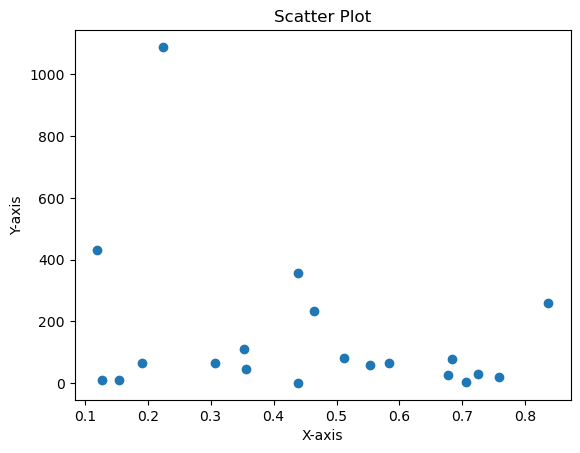

In [9]:
x = inputs[:,0]
y = outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

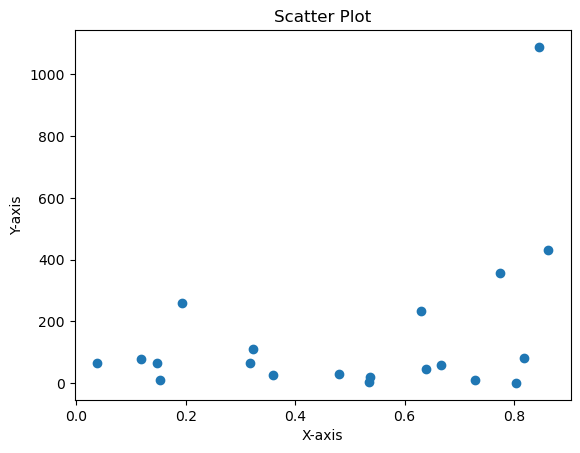

In [11]:
x = inputs[:,1]
y = outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

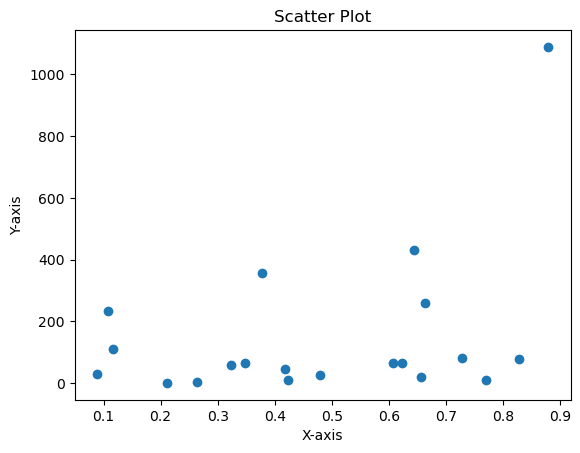

In [13]:
x = inputs[:,2]
y = outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

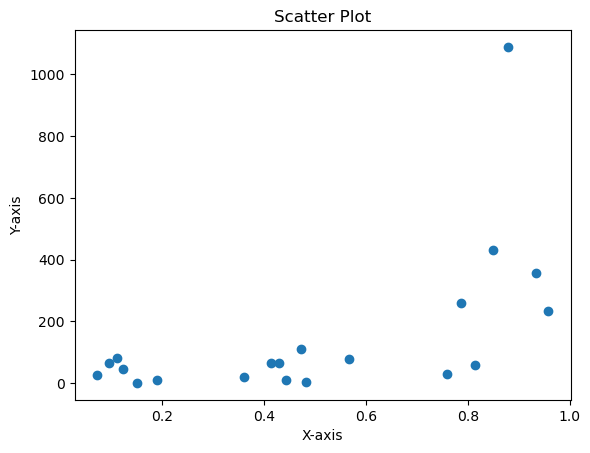

In [15]:
x = inputs[:,3]
y = outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

In [17]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,feature4,target
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525
5,0.683432,0.118663,0.829046,0.567577,78.434389
6,0.553621,0.667350,0.323806,0.814870,57.571537
7,0.352356,0.322242,0.116979,0.473113,109.571876
8,0.153786,0.729382,0.422598,0.443074,8.847992
9,0.463442,0.630025,0.107906,0.957644,233.223610


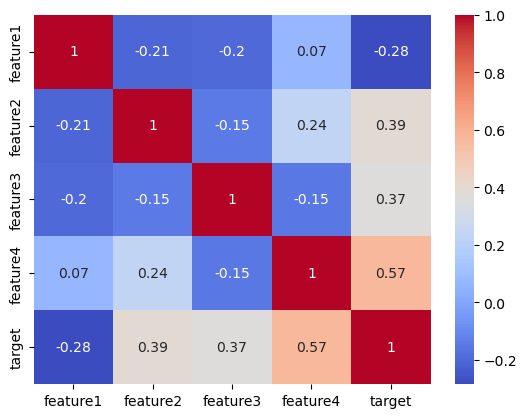

In [19]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  20 non-null     float64
 1   feature2  20 non-null     float64
 2   feature3  20 non-null     float64
 3   feature4  20 non-null     float64
 4   target    20 non-null     float64
dtypes: float64(5)
memory usage: 932.0 bytes


In [27]:
df.describe()

,feature1,feature2,feature3,feature4,target
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.460387,0.498557,0.477944,0.494719,151.271876
std,0.227206,0.273619,0.246797,0.308458,251.955640
min,0.119879,0.038193,0.088947,0.072880,0.112940
25%,0.286214,0.286061,0.308915,0.180712,22.892661
50%,0.451188,0.535355,0.451095,0.458093,63.948431
75%,0.678976,0.740559,0.657973,0.792954,140.484809
max,0.836478,0.862540,0.879484,0.957644,1088.859618


In [25]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,feature1,feature2,feature3,feature4,target
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.460387,0.498557,0.477944,0.494719,151.271876
std,0.227206,0.273619,0.246797,0.308458,251.955640
min,0.119879,0.038193,0.088947,0.072880,0.112940
10%,0.151096,0.144385,0.116072,0.110658,8.384282
25%,0.286214,0.286061,0.308915,0.180712,22.892661
50%,0.451188,0.535355,0.451095,0.458093,63.948431
75%,0.678976,0.740559,0.657973,0.792954,140.484809
90%,0.728601,0.820809,0.776051,0.884034,363.387412
max,0.836478,0.862540,0.879484,0.957644,1088.859618


In [29]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.97, 0.99])

,feature1,feature2,feature3,feature4,target
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.460387,0.498557,0.477944,0.494719,151.271876
std,0.227206,0.273619,0.246797,0.308458,251.955640
min,0.119879,0.038193,0.088947,0.072880,0.112940
10%,0.151096,0.144385,0.116072,0.110658,8.384282
25%,0.286214,0.286061,0.308915,0.180712,22.892661
50%,0.451188,0.535355,0.451095,0.458093,63.948431
75%,0.678976,0.740559,0.657973,0.792954,140.484809
90%,0.728601,0.820809,0.776051,0.884034,363.387412
95%,0.762544,0.847283,0.831568,0.934894,464.475100


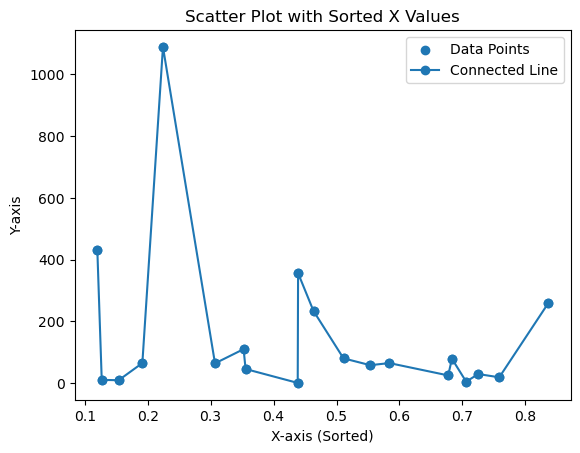

In [31]:
x = df["feature1"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature1 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

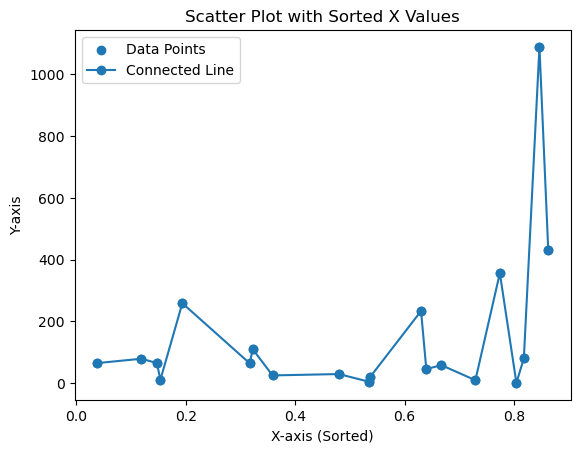

In [33]:
x = df["feature2"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature2 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

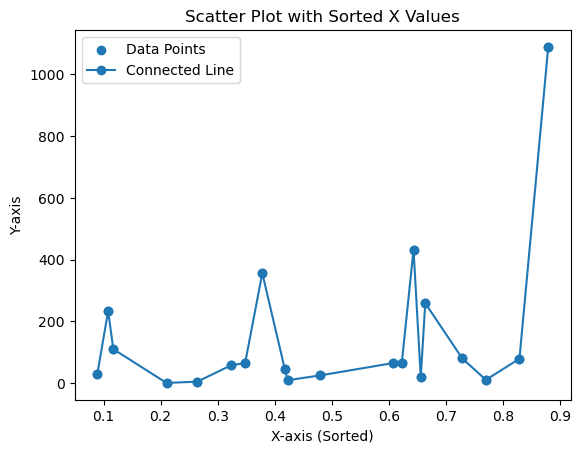

In [35]:
x = df["feature3"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature3 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

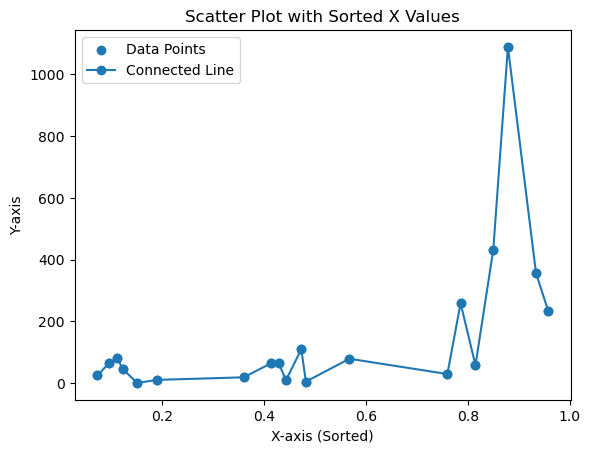

In [37]:
x = df["feature4"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature4 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()